In [16]:
import pandas as pd
import numpy as np
from time import time
from poloniex import Poloniex
import matplotlib.pyplot as plt

In [2]:
#Criando uma instancia de Poloniex
polo = Poloniex()

In [111]:
api = Poloniex(jsonNums=float)

#period=api.DAY, start=time()-api.YEAR*10
raw = api.returnChartData('BTC_ETH', period=300, start=time()-api.MONTH*3)
df = pd.DataFrame(raw)

In [112]:
# Ajustando o formato  data e setando como index
df['date'] = pd.to_datetime(df["date"], unit='s')
df.set_index('date', inplace=True)

In [113]:
df.head()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2020-04-14 15:34:08,0.023115,0.023115,0.023115,0.023115,0.000000,0.000000,0.023115
2020-04-14 15:35:00,0.023131,0.023139,0.023120,0.023132,3.359898,0.077682,0.023120
2020-04-14 15:40:00,0.023134,0.023155,0.023134,0.023139,47.241380,1.093785,0.023153
2020-04-14 15:45:00,0.023123,0.023142,0.023110,0.023138,35.125133,0.811990,0.023117
2020-04-14 15:50:00,0.023138,0.023155,0.023123,0.023123,14.556544,0.336881,0.023143


In [6]:
df.shape

(25921, 7)

In [7]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2020-07-13 13:20:00,0.026252,0.026279,0.026252,0.026271,9.738598,0.255774,0.026264
2020-07-13 13:25:00,0.026266,0.026281,0.026238,0.026238,3.802965,0.099904,0.026270
2020-07-13 13:30:00,0.026255,0.026270,0.026255,0.026270,14.871587,0.390597,0.026265
2020-07-13 13:35:00,0.026259,0.026263,0.026255,0.026255,0.001322,0.000035,0.026262
2020-07-13 13:40:00,0.026263,0.026263,0.026255,0.026263,0.950676,0.024965,0.026260


# Retorno Simples

In [8]:
df['simpleReturn'] = (df['close']/df['close'].shift(1))-1

In [9]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage,simpleReturn
date,,,,,,,,
2020-07-13 13:20:00,0.026252,0.026279,0.026252,0.026271,9.738598,0.255774,0.026264,0.000112
2020-07-13 13:25:00,0.026266,0.026281,0.026238,0.026238,3.802965,0.099904,0.026270,0.000533
2020-07-13 13:30:00,0.026255,0.026270,0.026255,0.026270,14.871587,0.390597,0.026265,-0.000432
2020-07-13 13:35:00,0.026259,0.026263,0.026255,0.026255,0.001322,0.000035,0.026262,0.000166
2020-07-13 13:40:00,0.026263,0.026263,0.026255,0.026263,0.950676,0.024965,0.026260,0.000162


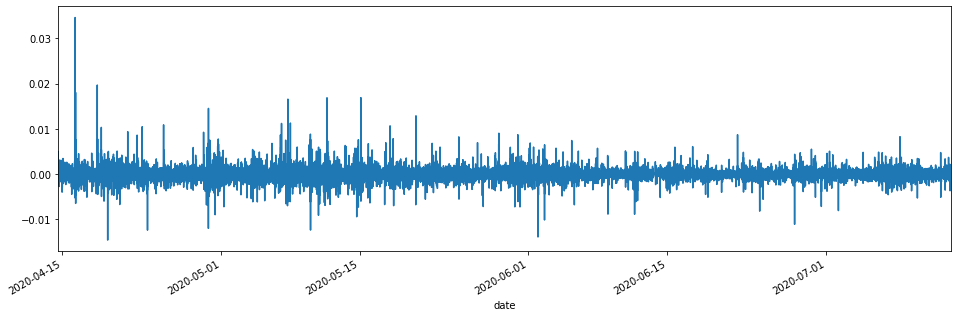

In [10]:
df['simpleReturn'].plot(figsize=(16,5));

In [15]:
df['simpleReturn'].mean()*12*24

0.0016989165151967407

# Retorno Logaritmo

In [18]:
df['logReturn'] = np.log(df['close']/df['close'].shift(1))

In [26]:
df = df = df["close"]

In [29]:
type(df)

pandas.core.series.Series

In [20]:
df['simpleReturn'].mean()*12*24

0.0016989165151967407

In [21]:
df['logReturn'].mean()*12*24

0.0014887510292352184

# Portfolio

In [106]:
def meuPortfolio(lista, coluna = 'close'): 
    raw = api.returnChartData(lista[0], period=300, start=time()-api.MONTH*3)
    df = pd.DataFrame(raw)
    df.drop(['high', 'low', 'open', 'quoteVolume', 'volume', 'weightedAverage'], axis=1, inplace=True)
    myData = df.copy()
    myData.rename(columns={coluna:lista[0]}, inplace=True)
    nova_lista = lista[1:]
    for t in nova_lista:    
        raw = api.returnChartData(t, period=300, start=time()-api.MONTH*3)
        df = pd.DataFrame(raw)
        df.rename(columns={coluna:t}, inplace=True)
        myData = pd.merge(myData, df[[t, 'date']], on=['date'], how="inner")
    
    myData['date'] = pd.to_datetime(myData["date"], unit='s')
    myData.set_index('date', inplace=True)
    return myData

In [123]:
tickers = ['BTC_ETH', 'BTC_XRP', 'BTC_DOGE', 'BTC_XMR']
teste = meuPortfolio(tickers)

In [124]:
teste.tail()

,BTC_ETH,BTC_XRP,BTC_DOGE,BTC_XMR
date,,,,
2020-07-13 15:40:00,0.026088,0.000022,3.500000e-07,0.007385
2020-07-13 15:45:00,0.026121,0.000022,3.500000e-07,0.007380
2020-07-13 15:50:00,0.026101,0.000022,3.600000e-07,0.007385
2020-07-13 15:55:00,0.026131,0.000022,3.600000e-07,0.007407
2020-07-13 16:00:00,0.026132,0.000022,3.600000e-07,0.007421


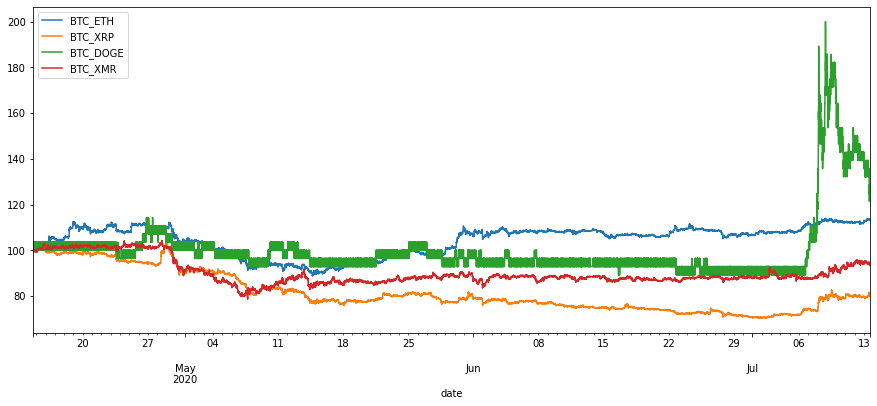

In [125]:
(teste/teste.iloc[0]*100).plot(figsize = (15,6));
plt.show()

In [126]:
retornoSimples = (teste/teste.shift(1))-1

In [127]:
retornoSimples.head()

,BTC_ETH,BTC_XRP,BTC_DOGE,BTC_XMR
date,,,,
2020-04-14 16:05:00,NaN,NaN,NaN,NaN
2020-04-14 16:10:00,-0.000317,-0.000368,0.000000,-0.000068
2020-04-14 16:15:00,0.000404,0.000737,0.035714,0.000072
2020-04-14 16:20:00,0.001463,0.001105,-0.034483,0.001765
2020-04-14 16:25:00,0.001605,0.000736,0.000000,0.000000


In [128]:
pesos = [0.25, 0.25, 0.25, 0.25]

In [129]:
np.dot(retornoSimples, pesos)

array([        nan, -0.00018846,  0.00923183, ...,  0.00688192,
        0.00125299,  0.00095848])

In [130]:
retorno_anual = retornoSimples.mean()*12*24*365

In [131]:
retorno_anual

BTC_ETH      0.574334
BTC_XRP     -0.791204
BTC_DOGE    18.791461
BTC_XMR     -0.078624
dtype: float64

In [132]:
np.dot(retorno_anual, pesos)

4.623991745969181